# Sigmoid Neuron


1. **Data** - It can work with Real valued inputs. <br>
2. **Task**  - It can perform Classification and Regression tasks.<br>
3. **Model** - <br><br>
$\displaystyle Y_{w,b}(x)=\displaystyle\mathbf{\frac{1}{1+e^{-(wx + b)}}}$ <br><br>
    &emsp;&emsp; a. Non Linear Model - This Can be used to separate non linear data as well. <br>
    &emsp;&emsp; b. Parameters  - W, b <br>
4. **Loss Function** - Cross Entropy Loss. This helps to find out the difference between two probability distribution. <br>
5. **Learning Algorithm**- Gradient Descent

***
$\mathbf{\text{Gradient descent}}$
***
**Gradient Descent is an optimization algorithm widely used in machine learning to minimize the cost or loss function associated with a model.**
1. $\text{Initialise w,b}$<br>
2. $\text{Iterate over the data:}$<br>

&emsp;&emsp;&emsp; $w_{t+1} = w_{t} - \eta*\Delta{w}$ <br>
&emsp;&emsp;&emsp; $b_{t+1} = b_{t} - \eta*\Delta{b}$

&emsp;&emsp; where $\mathbf{\Delta{w}} = \displaystyle \frac{\partial L}{\partial w}$ , $\mathbf{L}=\sum\limits _{i=1} ^{n} (y_{i} - \hat{y})^{2}$ <br>

$\text{After calculating the partial Derivative of L with respect to}$ $w$ $\text{the value comes out to be}$<br>

$\Delta{w} = \sum _{i=1} ^{n} (\hat{y_{i}}-y_i) * \hat{y} * (1- \hat{y}) * x$ <br>

$\text{Similarly}$ <br>
$\Delta{b} = \sum _{i=1} ^{n} (\hat{y_{i}}-y_i) * \hat{y} * (1- \hat{y})$ <br>

where n= Number of Data points


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from mpl_toolkits import mplot3d
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, mean_squared_error , log_loss
from tqdm.notebook import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
def sigmoid(x,w,b):
    return 1/(1+np.exp(-(w*x+b)))

In [13]:
sigmoid(1,0.5,0)

0.6224593312018546

In [14]:
#python broadcasting - Calling the sigmoid function for all the values of X
# Generating 5 equally spaced real values in the range [-10,10]
X = np.linspace(-10,10,5)
w = 0.5
b = 0.5
sigmoid(X,w,b)

array([0.01098694, 0.11920292, 0.62245933, 0.95257413, 0.99592986])

#### The above function is calculated in 2 steps here :
1) The scalar values w and b are not broadcasted. They remain scalars throughout the computation. <br>
2) The sigmoid is calculated for each value of X one by one .

### Let's see how sigmoid behaves with different values of w,b .
* Changing values of w.
* Changing the values of b.


### 1. Changing values of w

In [39]:
def plot_sigmoid(W,b,X):
    plt.figure(figsize=(10, 7)) 
    for w in W:
        #python broadcasting - Calling the sigmoid function for all the values of X
        Y = sigmoid(X,w,b)
        plt.plot(X,Y, label="w = {}".format(round(w,2)))
    plt.legend()
    plt.grid()
    plt.show()

def plot_sigmoid_changing_b(W,B,X):
    plt.figure(figsize=(10, 7)) 
    for b in sorted(B,reverse=False):
        #python broadcasting - Calling the sigmoid function for all the values of X
        Y = sigmoid(X,w,b)
        plt.plot(X,Y, label="b = {}".format(round(b,2)))
    plt.legend()
    plt.grid()
    plt.show()


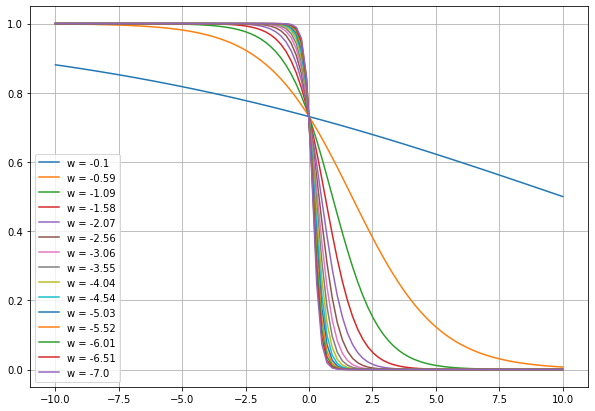

In [7]:
# Let's see what happens when we make w more negative
W = np.linspace(-0.1, -7, 15)
b =1
X = np.linspace(-10,10,100)
plot_sigmoid(W,b,X)

####  Observations
* Negative values of w leads to negative slope in the curve.
* It's evident from the plot above that as w takes on more negative values, the curve exhibits a more pronounced negative slope or becomes steeper in its descent.

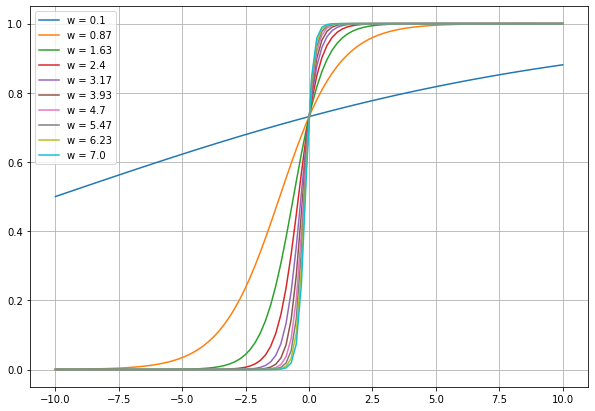

In [8]:
# Let's see what happens when we make w more positive
W = np.linspace(0.1, 7, 10)
b = 1
X = np.linspace(-10,10,100)
plot_sigmoid(W,b,X)

####  Observations
* Positive values of w leads to positive slope in the curve.
* We can clearly see in the above plot that more Positive values of w leads to more positive slope or more steepest slopes for the curve.

### 2. Changing values of b

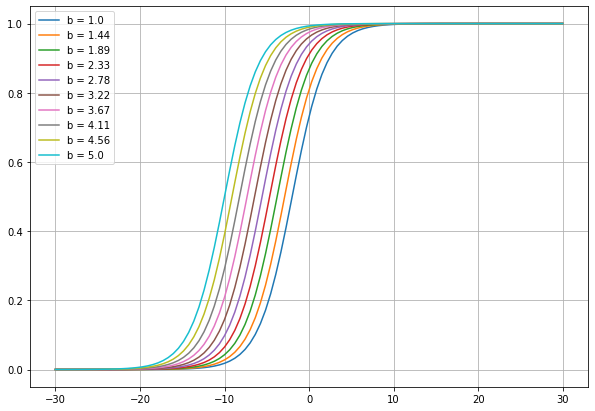

In [41]:
b = np.linspace(1, 5, 10)
W = 2
X = np.linspace(-30,30,100)
plot_sigmoid_changing_b(W,b,X)

We can clearly see that with the decrease in the b value, the curve is shifted to the right on X-axis.

### In case we have 2 features $x_1, x_2$
$\mathbf{S_{w_1,w_2,b}(x_1,x_2)}=$$\frac{\mathbf{1}}{\mathbf{e^{-(w_1x_1+w_2x_2 + b)}}}$


In [95]:
def sigmoid_2d(w1,w2,x1,x2,b):
    return (1/(1+np.exp(-(w1*x1+w2*x2 + b))))

In [96]:
# Let's check if it works with w2,x2=0
sigmoid_2d(0.5,0,1,0,0)

0.6224593312018546

### Let's see how to plot 3d plots in matplotlib

In [22]:
# https://www.geeksforgeeks.org/numpy-meshgrid-function/
# let's understand how to generate all the combinations of numbers given two numpy arrays x,y

x = [1,2,3] 
y = [0,1]

# Below is how the cartesian cordinates looks like for x,y
# (1,1) (2,1) (3,1)
# (1,0) (2,0) (3,0)

xx, yy = np.meshgrid(x,y)
# Number of rows in shape is decided by len of y array.
print("Shape of xx : {} , Shape of yy : {}".format(xx.shape, yy.shape))
print("We can see the x values for all the combinations from the cartesian system -")
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        print("({},)".format(xx[i][j]), end="")
    print()
    
print("We have the corressponding y values also in yy")

for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        print("(,{})".format(yy[i][j]), end="")
    print()

Shape of xx : (2, 3) , Shape of yy : (2, 3)
We can see the x values for all the combinations from the cartesian system -
(1,)(2,)(3,)
(1,)(2,)(3,)
We have the corressponding y values also in yy
(,0)(,0)(,0)
(,1)(,1)(,1)


In [208]:
# Now we have 2 features X1, X2
X1 = np.linspace(-10,10,100)
X2 = np.linspace(-10,10,100)

# Now we need to generate all the possible combinations = (X1,X2) and For each combination we will have some Y value.

XX1, XX2 = np.meshgrid(X1,X2)
print(XX1.shape, XX2.shape)


(100, 100) (100, 100)


In [209]:
w1 = 0.5
w2 = 0.5
b =0 
Y= sigmoid_2d(w1,w2,XX1,XX2,b)

In [141]:
Y.shape

(100, 100)

In [221]:
def plot_contour(xx1,xx2,y):
    my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red", "yellow", "green"])
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.contourf(xx1,xx2,y,cmap= my_cmap, alpha= 0.6)
def plot_3d(x,y,z,x_label,y_label,z_label,rotation= False):
    fig = plt.figure(figsize=(8,8))
    ax = plt.axes(projection='3d')
    ax.plot_surface(x,y,z,cmap='viridis')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_zlabel(z_label)
    if rotation:
        ax.view_init(30,rotation)

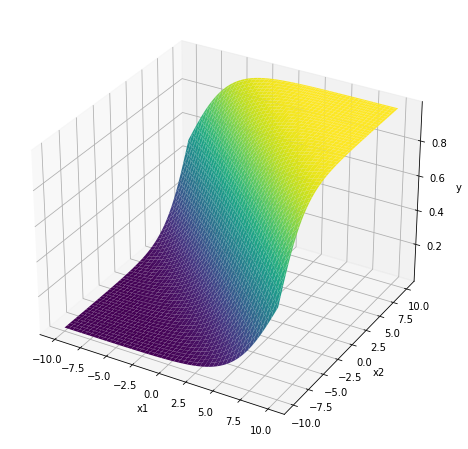

In [143]:
plot_3d(XX1,XX2,Y,'x1','x2','y')

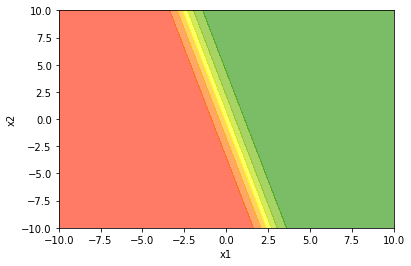

In [223]:
plot_contour(XX1,XX2,Y)

* The above plot points x1,x2 points in a manner that the different colour bands shows the y value.
* The red region points to y=0, and green region means y=1.
* One thing to note here is that the bands are quite symmetric across the red and green region. I.e it starts from one corner and goes to next corner , this happens because both our w values are 0.5 each. Equal in magnitude and positive. Low values of w essentially means that there is no sharp drop in Y values.
* Let us change the w values and see what happens.

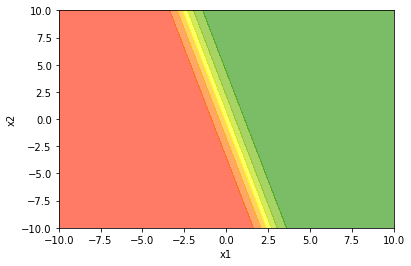

In [224]:
w1 = 2
w2 = 0.5
b =0 
Y= sigmoid_2d(w1,w2,XX1,XX2,b)
plot_contour(XX1,XX2,Y)

* After increasing the w1 value it is quiet evident that we have a very thin band so if we fix the x2 value as let's say 2.5 and draw a line parallel to $x_1$ axis , we will see that the Y value remains 0 for most of the time and suddenly changes from 0-1. That is there is a sharp change.
* Whereas if we do the opposite and fix the x1 value and draw a line parallel to x2 axis we can clearly see now the drop from greener region to red region is not that sharp as compared to the above case. It happened for obvious reason that we did not change the w2 value. 

#### Let's change the sign of w and observe the changes

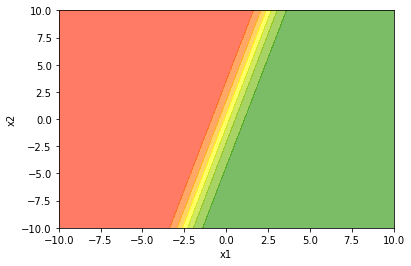

In [226]:
w1 = 2
w2 = -0.5
b =0 
Y= sigmoid_2d(w1,w2,XX1,XX2,b)
plot_contour(XX1,XX2,Y)

* If we repeat the similar exercise and draw a line parallel to x2 axis . You will observe that while we come down from a greener region to red region , for -ve values of x2 we have +ve y values. So the behavior has been changed.

## Compute loss for a given dataset

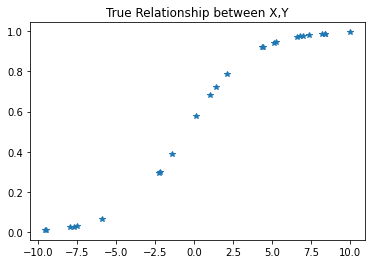

In [184]:
# Generating 25 random numbers between -10,10
w_unknown, b_unknown = 0.5, 0.25
# np.random.random() Generate a random float number between 0 (inclusive) and 1 (exclusive). 
# Generating 25 numbers bw -10,10
X = np.random.random(25)*20 - 10
Y = sigmoid(X, w_unknown, b_unknown)
plt.plot(X,Y, "*")
plt.title("True Relationship between X,Y")
plt.show()

#### Given the above dataset, we would like to estimate the best w,b

In [176]:
# Squared Error Loss
def calculate_loss(X,Y,w,b):
    error = 0
    for x,y in zip(X,Y):
        y_hat = sigmoid(x,w,b)
        error_x = (y-y_hat)**2
        error+=error_x
    return error

# we will have to try with all the combinations of w,b for which loss is minimum
def find_best_params(WW,BB):
    loss = np.zeros(WW.shape)
    # calculating loss for all the pairs of w,b
    for i in range(WW.shape[0]):
        for j in range(WW.shape[1]):
            loss[i][j] = calculate_loss(X,Y,WW[i,j], BB[i,j])
            #print(loss[i][j])
    # argmin will return the index after flattening the loss matrix 
    ij = np.argmin(loss)
    # calculate i and j values . If we divide this flattened value by n_columns the quotient becomes i and remainder becomes the j value
    i = int(np.floor(ij/loss.shape[1]))
    j = ij%loss.shape[1]
    min_loss = loss[i,j]
    return loss,loss[i,j], WW[i,j] , BB[i,j]

Min loss : 6.12064319495066e-05. w : 0.49 , b : 0.25


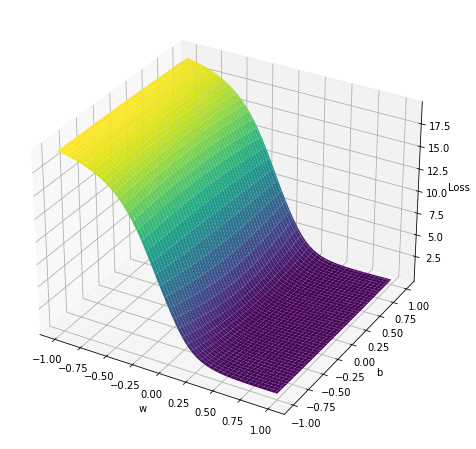

In [183]:
# Let us define the search space for w,b
W = np.linspace(-1,1,100)
B = np.linspace(-1,1,100)
WW,BB = np.meshgrid(W,B)
loss, min_loss, w , b = find_best_params(WW,BB)
plot_3d(WW,BB,loss, "w", "b", "Loss")
print("Min loss : {}. w : {} , b : {}".format(min_loss,round(w,2),round(b,2)))

### Observations
1. Clearly a negative value of $\textbf{w}$ is not a good choice as it will lead to high error
2. A negative value of $\textbf{w}$ means the sigmoid curve will have a negative slope, whereas if we see the actual relationship between $\textbf{x}$,$\textbf{y}$ it has a positive slope. So for a negative value of $\textbf{w}$ will lead to a S-shaped curve but kind of a mirror image of the actual relationship and hence will lead to more erros for each value of $\textbf{x}$.

Min loss : 3.430643949875682e-05. w : 0.5 , b : 0.26


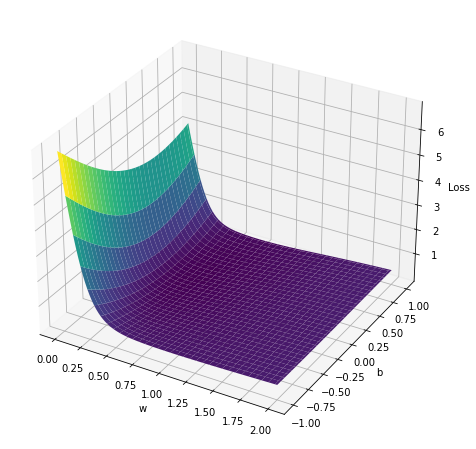

In [185]:
# Let us refine the search space for w,b given that we know the negative values of w won't make much sense
W_refined = np.linspace(0,2,101)
B = np.linspace(-1,1,101)
WW,BB = np.meshgrid(W_refined,B)
loss, min_loss, w , b = find_best_params(WW,BB)
plot_3d(WW,BB,loss, "w", "b", "Loss")
print("Min loss : {}. w : {} , b : {}".format(min_loss,round(w,2),round(b,2)))

# Class for Sigmoid Neuron

In [2]:
class SigmoidNeuron():
    def __init__(self):
        self.w = None
        self.b = None
        
    def perceptron(self,x):
        dot_prod = np.dot(x,self.w.T)
        #print("b : ",self.b)
        return (dot_prod + self.b)
    
    def sigmoid(self,x):
        return (1.0/(1.0+np.exp(-x)))
    
    def grad_w_mse(self,x,y,i):
        y_pred = self.sigmoid(self.perceptron(x))
        return ((y_pred-y) * y_pred * (1-y_pred) * x[i])
    
    def grad_b_mse(self,x,y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred-y) * y_pred * (1-y_pred)
    
    def grad_w_ce(self,x,y,i):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * x[i]
    
    def grad_b_ce(self,x,y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y)
    
    def fit(self,X,Y, epochs=1, learning_rate=1, initialise= True, display_loss=False, loss_fun="mse"):
        if initialise:
            self.w = np.random.randn(1,X.shape[1])
            self.b = 0
        if display_loss:
            loss = {}
        for i in tqdm(range(epochs), total=epochs, unit="epochs"):
            dw = np.zeros(X.shape[1])
            db = 0
            # calculate gradients for each parameter w_i
            for j in range(X.shape[1]):
                for x,y in zip(X,Y):
                    dw[j] = dw[j] + self.grad_w_mse(x,y,j)
            
            for x,y in zip(X,Y):
                db+=self.grad_b_mse(x,y)
            # update rule
            self.w-=learning_rate*dw
            self.b-=learning_rate*db
            
            if display_loss:
                y_pred = self.sigmoid(self.perceptron(X))
                if loss_fun=='mse':
                    loss[i] = mean_squared_error(Y, y_pred) 
                elif loss_fun=="ce":
                    loss[i] = log_loss(y,y_pred)
        
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel("Epochs")
            if loss_fun=="mse":
                plt.ylabel("Mean Squared Error")
            elif loss_fun=="ce":
                plt.ylabel("Log Loss")
            plt.show()
            #print(self.w, self.b)  
    
    def predict(self, X):
        predictions = []
        for x in X:
            predictions.append(self.sigmoid(self.perceptron(x)))
        return np.asarray(predictions)

## Fit for Toy data

In [256]:
X = np.asarray([[2.5,2.5] , [4,-1] , [1,-4] , [3,1.25] , [2,4] , [1,5]])
Y = np.asarray([1,1,1,0,0,0])

  0%|          | 0/5 [00:00<?, ?epochs/s]

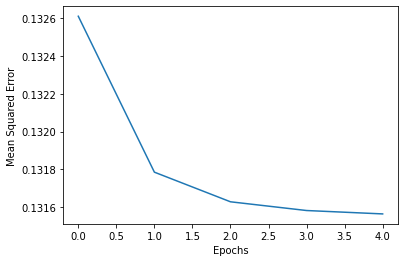

In [258]:
sn = SigmoidNeuron()
sn.fit(X,Y,5,0.5,display_loss=True)

Let's use some animation to show how decision boundary changes for the above 6 points when the model is being Trained.Refer to videos Toy1, Toy2

## Let's work on some Real world data now

In [221]:
data = pd.read_csv("mobile_cleaned-1551253091700.csv")
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,1,0,0,0,1,4.4


In [222]:
# binarising the Target variable "class", such that we have almost a balanced dataset.
threshold = 4.1
y = (data['Rating']>threshold).astype(int)
y.value_counts(normalize=True)

0    0.533724
1    0.466276
Name: Rating, dtype: float64

In [223]:
data['class'] = y.values
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating,class
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,1,0,0,0,1,4.5,1
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,1,0,0,0,1,4.5,1
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,1,0,0,0,1,4.4,1
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,1,0,0,0,0,1,4.3,1
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,1,0,0,0,1,4.4,1


In [224]:
X = data.drop(['Rating', 'class'], axis=1)
X.shape

(341, 87)

In [225]:
X.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,0,1,0,0,0,1
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,0,1,0,0,0,1
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,0,1,0,0,0,1
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,0,1,0,0,0,0,1
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,0,1,0,0,0,1


In [226]:
Y= data['Rating']
Y_binarised = data['class']
Y.shape

(341,)

### Standardization

In [227]:
R = np.random.random([100,1])

In [228]:
np.mean(R)

0.5179950261031331

In [229]:
np.std(R)

0.26994207632613776

In [230]:
scaler = StandardScaler()
scaler.fit(R)
# Let's see what scaler has learn
print(scaler.mean_)
RT = scaler.transform(R)
print(np.mean(RT), np.std(RT))

[0.51799503]
3.064215547965432e-16 1.0


In [231]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, stratify=Y_binarised, random_state=1)

In [232]:
type(Y_train)

pandas.core.series.Series

In [233]:
X_train.shape , X_test.shape

((255, 87), (86, 87))

In [234]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Since the sigmoid neuron outputs the value in the range [0,1] . We cannot standardise the Y here with the same technique as that would have a standard dev of 1 with mean as 0. We want the Y values in the range of 0-1 only.

In [235]:
min_max_scaler = MinMaxScaler()

In [236]:
Y_train_scaled = min_max_scaler.fit_transform(Y_train.values.reshape(-1,1))
Y_test_scaled  = min_max_scaler.transform(Y_test.values.reshape(-1,1))

In [237]:
np.min(Y_train_scaled)

0.0

For accuracy calculations we will need binary outputs. So the threshold will change that we used earlier as 4.1

In [238]:
scaled_threshold = list(min_max_scaler.transform(np.asarray([threshold]).reshape(-1,1)))[0][0]

In [239]:
scaled_threshold

0.6399999999999999

In [240]:
Y_binarised_train = (Y_train_scaled>scaled_threshold).astype("int").ravel()
Y_binarised_test = (Y_test_scaled>scaled_threshold).astype("int").ravel()

In [241]:
Y_binarised_train.shape, Y_binarised_test.shape

((255,), (86,))

In [242]:
X_train_scaled[0].shape

(87,)

  0%|          | 0/200 [00:00<?, ?epochs/s]

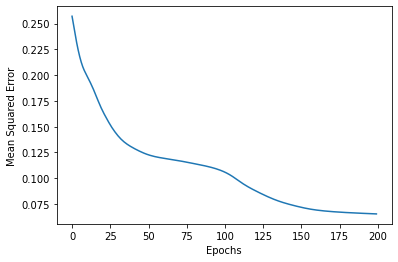

(0.6784313725490196, 0.7325581395348837)

In [251]:
sn = SigmoidNeuron()
sn.fit(X_train_scaled, Y_train_scaled, 200, 0.01, display_loss=True)
y_train_preds = sn.predict(X_train_scaled)
y_test_preds = sn.predict(X_test_scaled)
y_train_preds_binarised = (y_train_preds>scaled_threshold).astype("int").ravel()
y_test_preds_binarised = (y_test_preds>scaled_threshold).astype("int").ravel()
train_acc = accuracy_score(Y_binarised_train, y_train_preds_binarised)
test_acc = accuracy_score(Y_binarised_test, y_test_preds_binarised)
train_acc, test_acc